In [1]:
import pandas as pd
from sqlalchemy import create_engine
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url_cities="http://worldpopulationreview.com/world-cities/"

In [3]:
response=requests.get(url_cities)
response

<Response [200]>

In [50]:
soup=bs(response.content,"html.parser")
html_table=soup.find_all("table")
table=pd.read_html(str(html_table))
top_11=table[0].loc[table[0]["Rank"]<12,:]
top_11
top_11["Name"] = top_11["Name"].str.replace("Mumbai","Bombay")
top_11

C:\Users\Jose L. Mendoza\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rank,Name,2019 Population,2018 Population,Change
0,1,Tokyo,37435191,37468302,-0.09%
1,2,Delhi,29399141,28513682,3.11%
2,3,Shanghai,26317104,25582138,2.87%
3,4,Sao Paulo,21846507,21650181,0.91%
4,5,Mexico City,21671908,21580827,0.42%
5,6,Cairo,20484965,20076002,2.04%
6,7,Dhaka,20283552,19578421,3.60%
7,8,Bombay,20185064,19979955,1.03%
8,9,Beijing,20035455,19617963,2.13%
9,10,Osaka,19222665,19281188,-0.30%


In [51]:
cities=top_11["Name"].tolist()
cities

['Tokyo',
 'Delhi',
 'Shanghai',
 'Sao Paulo',
 'Mexico City',
 'Cairo',
 'Dhaka',
 'Bombay',
 'Beijing',
 'Osaka',
 'Karachi']

In [56]:
temperature_major_city=pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [57]:
temperature_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [58]:
temperature_major_city['Year'] = pd.DatetimeIndex(temperature_major_city['dt']).year 
temperature_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849


In [59]:
temperature_major_city["City"]=temperature_major_city["City"].str.replace("Mexico","Mexico City")
temperature_major_city["City"]=temperature_major_city["City"].str.replace("São Paulo", "Sao Paulo")
temperature_major_city["City"]=temperature_major_city["City"].str.replace("Peking","Beijing")

temperature_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849


In [60]:
cities_df=temperature_major_city.loc[temperature_major_city["City"].isin(cities),:]
#list=["Tokyo","Delhi","Shanghai","São Paulo","Mexico","Cairo","Bombay","Peking","Dhaka","Karachi"]

In [61]:
cities_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
30016,1796-01-01,24.317,2.190,Bombay,India,18.48N,72.68E,1796
30017,1796-02-01,23.923,1.484,Bombay,India,18.48N,72.68E,1796
30018,1796-03-01,24.407,2.309,Bombay,India,18.48N,72.68E,1796
30019,1796-04-01,27.171,1.650,Bombay,India,18.48N,72.68E,1796
30020,1796-05-01,29.050,1.290,Bombay,India,18.48N,72.68E,1796


In [62]:
cities_and_years_df=cities_df.loc[cities_df["Year"] > 1949]
cities_and_years_df.head(13)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
31864,1950-01-01,24.028,0.364,Bombay,India,18.48N,72.68E,1950
31865,1950-02-01,22.553,0.357,Bombay,India,18.48N,72.68E,1950
31866,1950-03-01,25.088,0.367,Bombay,India,18.48N,72.68E,1950
31867,1950-04-01,27.288,0.289,Bombay,India,18.48N,72.68E,1950
31868,1950-05-01,29.165,0.523,Bombay,India,18.48N,72.68E,1950
31869,1950-06-01,28.983,0.341,Bombay,India,18.48N,72.68E,1950
31870,1950-07-01,26.905,0.384,Bombay,India,18.48N,72.68E,1950
31871,1950-08-01,27.244,0.278,Bombay,India,18.48N,72.68E,1950
31872,1950-09-01,27.033,0.354,Bombay,India,18.48N,72.68E,1950
31873,1950-10-01,27.344,0.320,Bombay,India,18.48N,72.68E,1950


In [63]:
group_by_year = cities_and_years_df.groupby(['Year','City','Country']).mean().reset_index()
top10 = group_by_year.head(10)
top10
top_cities=top10["City"].tolist()
top_cities

['Beijing',
 'Bombay',
 'Cairo',
 'Delhi',
 'Dhaka',
 'Karachi',
 'Mexico City',
 'Sao Paulo',
 'Shanghai',
 'Tokyo']

In [64]:
cities_population_table = pd.DataFrame()
n=1
for city in top_cities:
   #print(city)
    line = top10.loc[top10["City"] == city,:]
    country=line["Country"].tolist()[0]
    city=city.replace(" ","-")
    #print(country)
    city_population_table=pd.DataFrame()
    url_city="https://populationstat.com/"+country+"/"+city
    print(url_city)
    response2=requests.get(url_city)
    soup2=bs(response2.content,"html.parser")
    years=soup2.find_all("span",class_="year")
    populations=soup2.find_all("span",class_="pop")
    yrs=[]
    pops=[]
    for year in years:
        yr= int(year.text[0:4])
        yrs.append(yr)
    for population in populations:
        pop=population.text[0:1000000000]
        pop=pop.replace(",","")
        pop=int(pop)
        pops.append(pop)
    city_population_table["Year"]=yrs
    city_population_table["Population"]=pops
    city_population_table["City"]= city
    city_population_table["Country"]= country
    if n == 1:
        cities_population_table=city_population_table
        n=2
    else:
        cities_population_table=cities_population_table.append(city_population_table)
        #print(city_population_table.head())
        #print(cities_population_table.tail())

https://populationstat.com/China/Beijing
https://populationstat.com/India/Bombay
https://populationstat.com/Egypt/Cairo
https://populationstat.com/India/Delhi
https://populationstat.com/Bangladesh/Dhaka
https://populationstat.com/Pakistan/Karachi
https://populationstat.com/Mexico/Mexico-City
https://populationstat.com/Brazil/Sao-Paulo
https://populationstat.com/China/Shanghai
https://populationstat.com/Japan/Tokyo


In [65]:
cities_population_table.head()
cities_population_table["City"] = cities_population_table["City"].str.replace("-"," ")
cities_population_table["City"].unique()

array(['Beijing', 'Bombay', 'Cairo', 'Delhi', 'Dhaka', 'Karachi',
       'Mexico City', 'Sao Paulo', 'Shanghai', 'Tokyo'], dtype=object)

In [66]:
final_df = group_by_year.merge(cities_population_table, on = ["Year","City","Country"])
#final_df = pd.concat([group_by_year, cities_population_table], sort=False)
#final_df = final_df.drop(columns=['B', 'C'])
final_df.tail(10)


,Year,City,Country,AverageTemperature,AverageTemperatureUncertainty,Population
630,2013,Beijing,China,14.138625,0.658375,17664000
631,2013,Bombay,India,26.713000,0.509625,18885000
632,2013,Cairo,Egypt,22.907000,0.476125,18027000
633,2013,Delhi,India,26.709250,0.548375,24239000
634,2013,Dhaka,Bangladesh,26.587000,0.512625,16389000
635,2013,Karachi,Pakistan,27.211625,0.635625,13593000
636,2013,Mexico City,Mexico,17.342444,0.546111,20850000
637,2013,Sao Paulo,Brazil,20.066500,0.592375,20387000
638,2013,Shanghai,China,17.857625,0.588875,22179000
639,2013,Tokyo,Japan,13.911500,0.526125,37116000


In [67]:
final_transformed = final_df.rename(columns = {"Year": "year", "City":"city", "Country":"country", 
                                              "AverageTemperature":"averagetemperature", "AverageTemperatureUncertainty": 
                                              "averagetemperatureuncertainty", "Population":"population"})

final_transformed.head()
final_transformed.dtypes

year                               int64
city                              object
country                           object
averagetemperature               float64
averagetemperatureuncertainty    float64
population                         int64
dtype: object

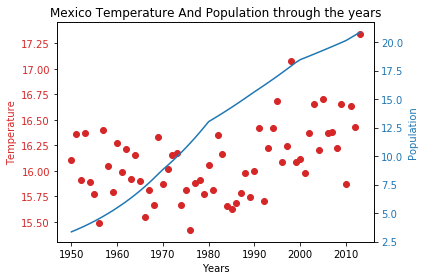

In [68]:
mexico_df=final_df.loc[final_df["City"] == "Mexico City"]


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature', color=color)
ax1.scatter(mexico_df.Year, mexico_df.AverageTemperature, color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(mexico_df.Year, mexico_df.Population/1000000, color=color)
#ax2.set_yticks(ax2.get_yticks()[::2])
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Mexico Temperature And Population through the years")


fig.tight_layout()  
plt.show()
fig.savefig("Mexico City Plot.png")


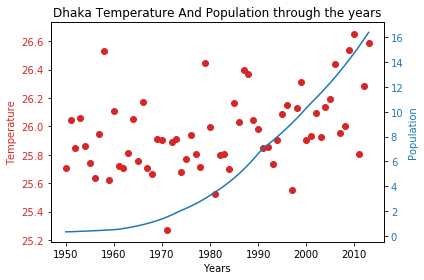

In [69]:
dhaka_df=final_df.loc[final_df["City"] == "Dhaka"]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature', color=color)
ax1.scatter(dhaka_df.Year, dhaka_df.AverageTemperature, color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(dhaka_df.Year, dhaka_df.Population/1000000, color=color)
#ax2.set_yticks(ax2.get_yticks()[::2])
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Dhaka Temperature And Population through the years")

fig.tight_layout()  
plt.show()
fig.savefig("Dhaka Plot.png")

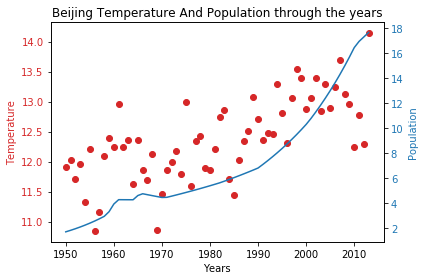

In [70]:
beijing_df=final_df.loc[final_df["City"] == "Beijing"]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature', color=color)
ax1.scatter(beijing_df.Year, beijing_df.AverageTemperature, color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(beijing_df.Year, beijing_df.Population/1000000, color=color)
#ax2.set_yticks(ax2.get_yticks()[::2])
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Beijing Temperature And Population through the years")

fig.tight_layout()  
plt.show()
fig.savefig("Beijing Plot.png")


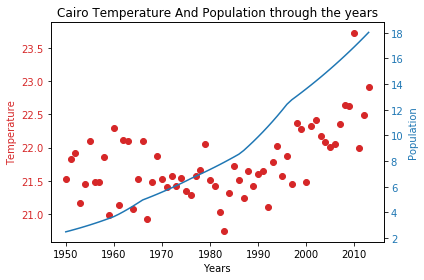

In [71]:
cairo_df=final_df.loc[final_df["City"] == "Cairo"]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature', color=color)
ax1.scatter(cairo_df.Year, cairo_df.AverageTemperature, color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(cairo_df.Year, cairo_df.Population/1000000, color=color)
#ax2.set_yticks(ax2.get_yticks()[::2])
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Cairo Temperature And Population through the years")

fig.tight_layout()  
plt.show()
fig.savefig("Cairo Plot.png")

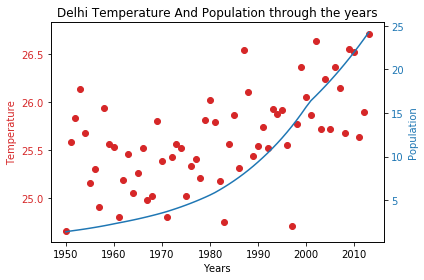

In [72]:
delhi_df=final_df.loc[final_df["City"] == "Delhi"]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature', color=color)
ax1.scatter(delhi_df.Year, delhi_df.AverageTemperature, color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(delhi_df.Year, delhi_df.Population/1000000, color=color)
#ax2.set_yticks(ax2.get_yticks()[::2])
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Delhi Temperature And Population through the years")

fig.tight_layout()  
plt.show()
fig.savefig("Delhi Plot.png")

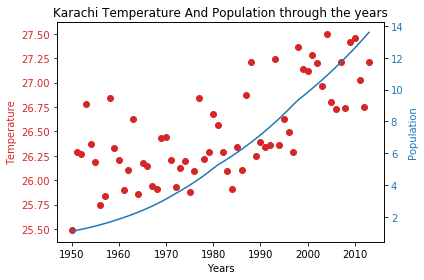

In [73]:
karachi_df=final_df.loc[final_df["City"] == "Karachi"]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature', color=color)
ax1.scatter(karachi_df.Year, karachi_df.AverageTemperature, color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(karachi_df.Year, karachi_df.Population/1000000, color=color)
#ax2.set_yticks(ax2.get_yticks()[::2])
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Karachi Temperature And Population through the years")

fig.tight_layout()  
plt.show()
fig.savefig("Karachi Plot.png")

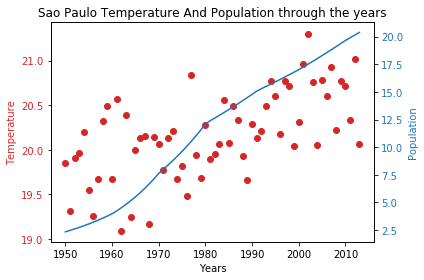

In [74]:
sao_paulo_df=final_df.loc[final_df["City"] == "Sao Paulo"]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature', color=color)
ax1.scatter(sao_paulo_df.Year, sao_paulo_df.AverageTemperature, color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(sao_paulo_df.Year, sao_paulo_df.Population/1000000, color=color)
#ax2.set_yticks(ax2.get_yticks()[::2])
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Sao Paulo Temperature And Population through the years")

fig.tight_layout()  
plt.show()
fig.savefig("Sao Paulo Plot.png")

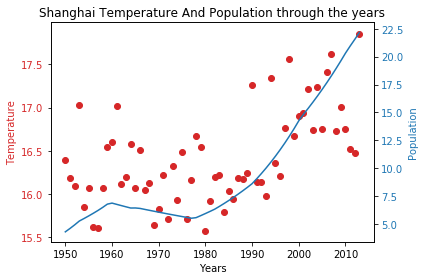

In [75]:
shanghai_df=final_df.loc[final_df["City"] == "Shanghai"]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature', color=color)
ax1.scatter(shanghai_df.Year, shanghai_df.AverageTemperature, color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(shanghai_df.Year, shanghai_df.Population/1000000, color=color)
#ax2.set_yticks(ax2.get_yticks()[::2])
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Shanghai Temperature And Population through the years")

fig.tight_layout()  
plt.show()
fig.savefig("Shanghai Plot.png")

<function matplotlib.pyplot.show(*args, **kw)>

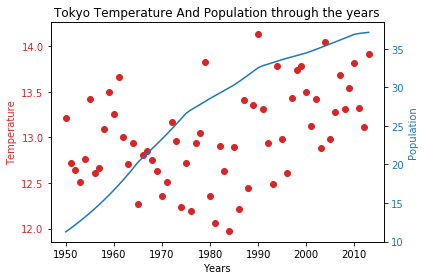

In [77]:
tokyo_df=final_df.loc[final_df["City"] == "Tokyo"]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature', color=color)
ax1.scatter(tokyo_df.Year, tokyo_df.AverageTemperature, color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(tokyo_df.Year, tokyo_df.Population/1000000, color=color)
#ax2.set_yticks(ax2.get_yticks()[::2])
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Tokyo Temperature And Population through the years")

fig.tight_layout()  
fig.savefig("Tokyo Plot.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

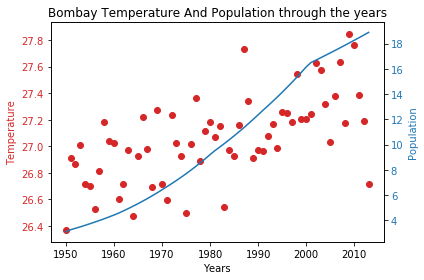

In [79]:
bombay_df=final_df.loc[final_df["City"] == "Bombay"]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature', color=color)
ax1.scatter(bombay_df.Year, bombay_df.AverageTemperature, color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(bombay_df.Year, bombay_df.Population/1000000, color=color)
#ax2.set_yticks(ax2.get_yticks()[::2])
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Bombay Temperature And Population through the years")

fig.tight_layout() 
fig.savefig("Bombay Plot.png")
plt.show

In [80]:
connection_string = "postgres:postgres@localhost:5432/projectETL_db"
engine = create_engine(f'postgresql://{connection_string}')

In [81]:
engine.table_names()

['temptopcities']

In [82]:
final_transformed.to_sql(name='temptopcities', con=engine, if_exists='append', index=True)